In [5]:
import numpy as np
import matplotlib.pyplot as plt


To solve the differential equation $\frac{du}{dt} = \frac{u-t}{u+t}$ using the Backward Euler method with fixed-point iteration, we need to rearrange the equation into a form suitable for iteration at each time step.

The Backward Euler update formula is given by:
$$ u_{n+1} = u_n + \Delta t \cdot f(u_{n+1}, t_{n+1}) $$

For our specific function $f(u, t) = \frac{u-t}{u+t}$, this becomes:
$$ u_{n+1} = u_n + \Delta t \cdot \frac{u_{n+1} - t_{n+1}}{u_{n+1} + t_{n+1}} $$

This equation cannot be solved algebraically for $u_{n+1}$ because it's nonlinear, so we'll iterate to find $u_{n+1}$ such that the right-hand side converges to a fixed point.

We'll define a function $g(u)$ for the fixed-point iteration as:
$$ g(u) = u_n + \Delta t \cdot \frac{u - t_{n+1}}{u + t_{n+1}} $$

where we use the iteration $u^{(k+1)} = g(u^{(k)})$ until convergence.


In [18]:

# Define the function for the fixed-point iteration
def g(u_n, u, dt, t_next):
    return u_n + dt * (u - t_next) / (u + t_next)

# Backward Euler method with fixed-point iteration
def backward_euler_fixed_point(u0, dt, t_end, tol = 1e-8, max_iter = 1000):
    n_steps = int(t_end / dt)
    u = np.zeros(n_steps + 1)
    t = np.linspace(0.0, t_end, n_steps + 1)
    u[0] = u0
    
    for n in range(n_steps):
        t_next = t[n+1]
        u_next = u[n]
        # Fixed-point iteration
        for _ in range(max_iter):  # Limit the maximum number of iterations
            u_next_new = g(u[n], u_next, dt, t_next)
            if np.abs(u_next_new - u_next) < tol:  # Convergence criteria
                break
            u_next = u_next_new
        u[n+1] = u_next
    
    return t, u


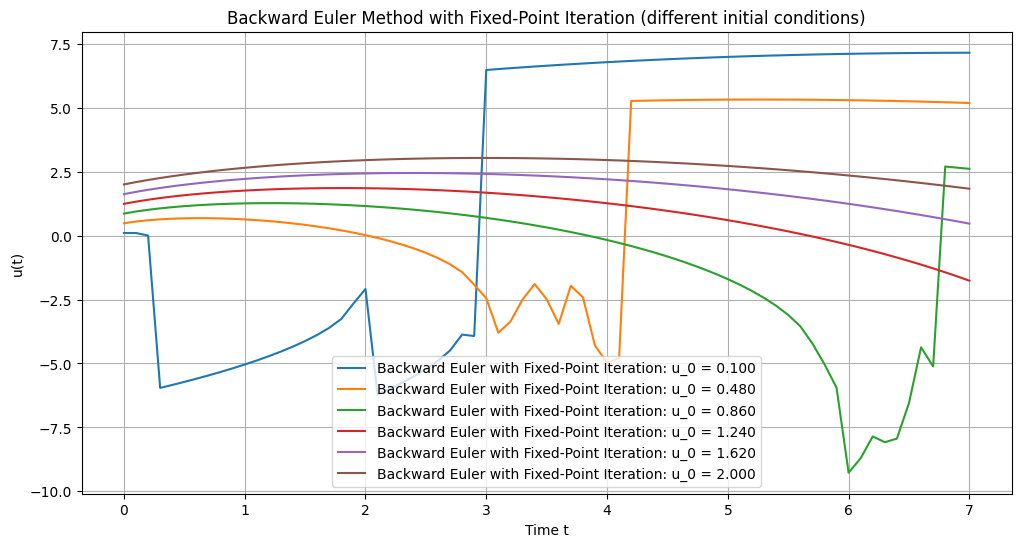

In [19]:
# Solve the ODE for an array of initial conditions
u0 = np.linspace(0.1, 2, num=6)  
dt = 0.1
t_end = 7
tol = 1e-8
max_iter = 1000
plt.figure(figsize=(12, 6))

for i in range(len(u0)):
    t, u_be_fp = backward_euler_fixed_point(u0[i], dt, t_end, tol = tol, max_iter = max_iter)
    plt.plot(t, u_be_fp, '-', label='Backward Euler with Fixed-Point Iteration: u_0 = ' + f'{u0[i]:.3f}')


# Plotting the results

# Numerical solution

# Labels and legend
plt.title('Backward Euler Method with Fixed-Point Iteration (different initial conditions)')
plt.xlabel('Time t')
plt.ylabel('u(t)')
plt.legend()
plt.grid(True)

plt.show()


The analytical solution provided is in an implicit form:
$$
\frac{1}{2} \log(t^2 + u^2) + \tan^{-1}\left( \frac{u}{t} \right) = 1.5708
$$

To find $u$ as a function of $t$ using Newton's method, we must first express this as a root-finding problem. Let's define a function $F(u, t)$ whose root (where $F(u, t) = 0$) corresponds to the solution of our equation:
$$
F(u, t) = \frac{1}{2} \log(t^2 + u^2) + \tan^{-1}\left( \frac{u}{t} \right) - 1.5708
$$

Newton's method updates the estimate for the root according to the formula:
$$
u_{\text{new}} = u_{\text{old}} - \frac{F(u_{\text{old}}, t)}{F'(u_{\text{old}}, t)}
$$

where $F'(u, t)$ is the derivative of $F(u, t)$ with respect to $u$.

For our function $F(u, t)$, the derivative $F'(u, t)$ with respect to $u$ is:
$$
F'(u, t) = \frac{u}{t^2 + u^2} + \frac{1}{1 + \left(\frac{u}{t}\right)^2} \cdot \frac{1}{t} = \frac{u}{t^2 + u^2} + \frac{t}{t^2 + u^2}
$$


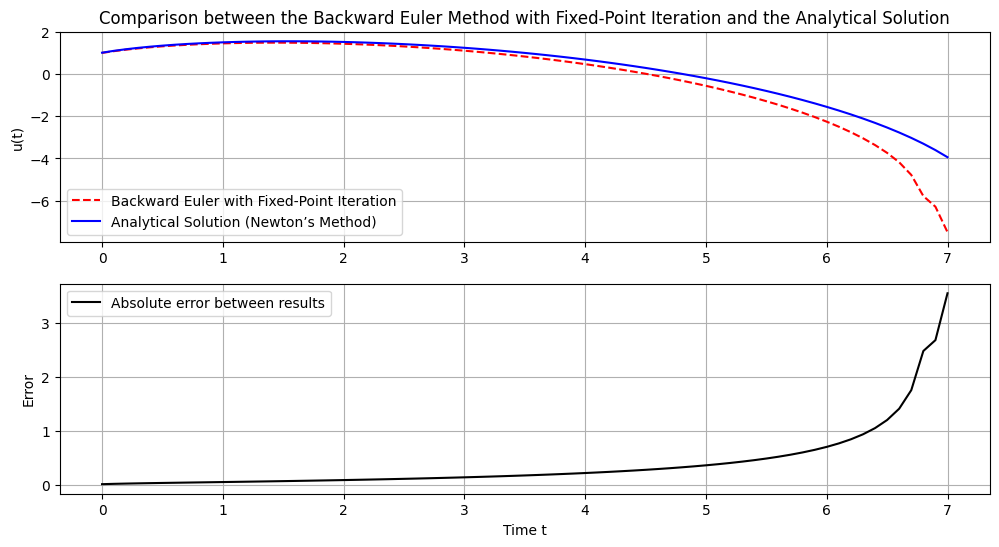

In [29]:
# Define the function F(u, t)
def F(u, t):
    return 0.5 * np.log(t**2 + u**2) + np.arctan(u/t) - 1.5708

# Define the derivative of the function F with respect to u, F'(u, t)
def F_prime(u, t):
    return u / (t**2 + u**2) + t / (t**2 + u**2)

# Newton's method to find the root of F(u, t) for a range of t values
def newtons_method(t_values, initial_guess, tol=1e-10, max_iter=100):
    u_values = []
    for t in t_values:
        u = initial_guess
        for _ in range(max_iter):
            F_u = F(u, t)
            F_u_prime = F_prime(u, t)
            u_new = u - F_u / F_u_prime
            if np.abs(u_new - u) < tol:
                break
            u = u_new
        u_values.append(u_new)
    return u_values

# Define the parameters
u0 = 1  
dt = 0.1
t_end = 7.0
tol = 1e-10
max_iter = 10000
n_steps = int(t_end / dt)
u = np.zeros(n_steps + 1)
t = np.linspace(0.01, t_end, n_steps + 1)

# Compute the numerical solution using Newton's method
u_values_nm = newtons_method(t, u0)

# Solve the ODE numerically

t, u_be_fp = backward_euler_fixed_point(u0, dt, t_end, tol = tol, max_iter=max_iter)


# Plotting the results
f, ax = plt.subplots(figsize=(12, 6), nrows=2)
# plt.figure(figsize=(12, 6))


ax[0].plot(t, u_be_fp, 'r--', label='Backward Euler with Fixed-Point Iteration')


ax[0].plot(t, u_values_nm,'b-', label='Analytical Solution (Newton’s Method)')
ax[0].set_title('Comparison between the Backward Euler Method with Fixed-Point Iteration and the Analytical Solution')


ax[0].set_ylabel('u(t)')
ax[0].legend()

# plt.title('Comparison between the Backward Euler Method with Fixed-Point Iteration and the Analytical Solution')

abs_error = np.abs(u_values_nm - u_be_fp)
ax[1].plot(t, abs_error,'k-', label='Absolute error between results')
ax[1].set_ylabel('Error')
ax[1].set_xlabel('Time t')
ax[1].legend()
ax[0].grid(True)
ax[1].grid(True)
plt.show()


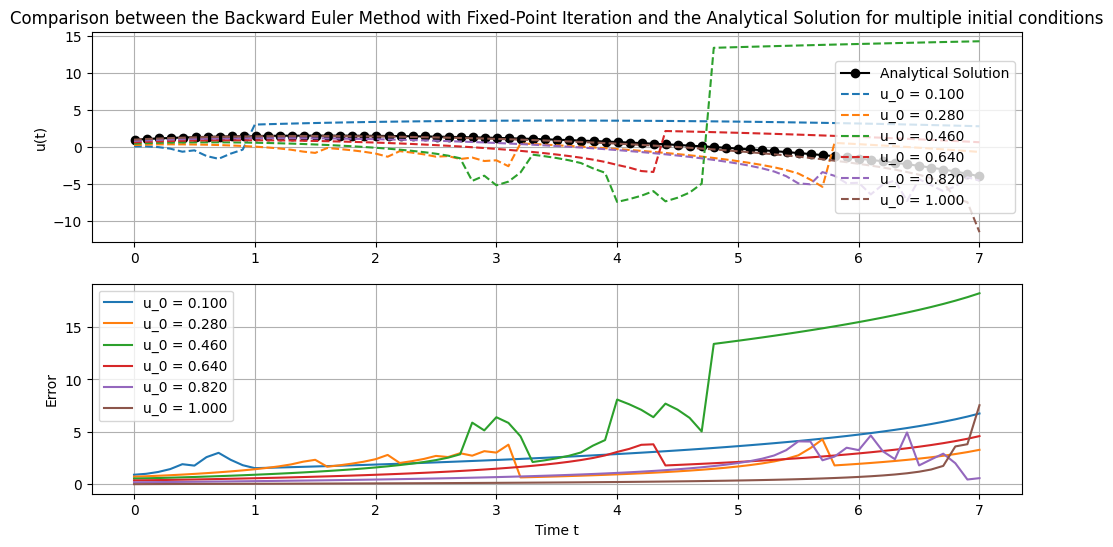

In [31]:
# Define the parameters

dt = 0.1
t_end = 7.0
tol = 1e-6
max_iter = 1000
n_steps = int(t_end / dt)
u = np.zeros(n_steps + 1)
u0 = np.linspace(0.1, 1.0, 6)
t = np.linspace(0.01, t_end, n_steps + 1)

f, ax = plt.subplots(figsize=(12, 6), nrows=2)

u_values_nm = newtons_method(t, u0[i])
ax[0].plot(t, u_values_nm, 'k-o', label='Analytical Solution')
for i in range(len(u0)):
    t, u_be_fp = backward_euler_fixed_point(u0[i], dt, t_end, tol = tol, max_iter = max_iter)
    ax[0].plot(t, u_be_fp, '--', label='u_0 = ' + f'{u0[i]:.3f}')
    ax[0].set_title('Comparison between the Backward Euler Method with Fixed-Point Iteration and the Analytical Solution for multiple initial conditions')
    ax[0].set_ylabel('u(t)')
    ax[0].legend()
    abs_error = np.abs(u_values_nm - u_be_fp)

    ax[1].plot(t, abs_error,'-',  label = "u_0 = " + f'{u0[i]:.3f}')
    # ax[1].set_labels = ["u_0 = " + f'{u0[i]:.3f}'for i in range(len(u0))]
    ax[1].legend()
    ax[1].set_ylabel('Error')
    ax[1].set_xlabel('Time t')






# plt.title('Comparison between the Backward Euler Method with Fixed-Point Iteration and the Analytical Solution')


ax[0].grid(True)
ax[1].grid(True)
plt.show()
